# Linear Regression using Diamonds Data

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [17]:
diamonds = pd.read_csv("../Data/Diamonds.csv")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [18]:
target = diamonds.price
diamonds.drop(columns=["price"], inplace=True)
diamonds["price"] = target
diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [19]:
non_numerical_classes = [cut for cut in diamonds.cut.unique()] + [color for color in diamonds.color.unique()] + [clarity for clarity in diamonds.clarity.unique()]
for classification in non_numerical_classes[:-1]:
    print(classification, end=", ")
print(non_numerical_classes[-1])

Ideal, Premium, Good, Very Good, Fair, E, I, J, H, F, G, D, SI2, SI1, VS1, VS2, VVS2, VVS1, I1, IF


In [21]:
diamonds.replace(non_numerical_classes,
                 [5, 4, 3, 2, 1,
                  1, 2, 3, 4, 5, 6, 7,
                  1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,5,1,1,61.5,55.0,3.95,3.98,2.43,326
1,0.21,4,1,2,59.8,61.0,3.89,3.84,2.31,326
2,0.23,3,1,3,56.9,65.0,4.05,4.07,2.31,327
3,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63,334
4,0.31,3,3,1,63.3,58.0,4.34,4.35,2.75,335


In [22]:
def normalize(df):
    '''Feature scaling using mean normalization.
    Scales feature values between -1 and 1.'''
    
    for column in df.columns[:-1]:
        df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df


normalized_diamonds = normalize(diamonds)
normalized_diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.198157,0.970744,-1.548378,-1.277151,-0.174090,-1.099662,-1.587823,-1.536181,-1.571115,326
1,-1.240350,0.180840,-1.548378,-0.711072,-1.360726,1.585514,-1.641310,-1.658759,-1.741159,326
2,-1.198157,-0.609064,-1.548378,-0.144993,-3.384987,3.375631,-1.498677,-1.457382,-1.741159,327
3,-1.071577,0.180840,-1.060610,0.421085,0.454129,0.242926,-1.364959,-1.317293,-1.287708,334
4,-1.029384,-0.609064,-0.572842,-1.277151,1.082348,0.242926,-1.240155,-1.212227,-1.117663,335


In [25]:
y = normalized_diamonds.price
X = normalized_diamonds.drop(['price'], axis=1)

### Equations

#### Hypothesis & Prediction / Polynomial Line of Best "Fit"
The hypothesis is updated using gradient descent until it is optimized to fit the polynomial hyperplane that best generalizes the data. This optimal hyperplane (or curve) is the model's prediction for unseen data points. $ x_0=1$. 

$y_{pred}=\hat{y}=h_{\vec{\theta}}(x)=\theta_0 x_0+\theta_1 x_1+...+\theta_n x_n$

$\vec{\theta}$ is the vector of weights and $\vec{x}$ is the vector of features.

Larger magnitude weights indicate the feature has more say in the prediction curve.

$\vec{\theta} = \begin{bmatrix} 
\theta_0 & \theta_1 & ... & \theta_n
\end{bmatrix},   \vec{x} = \begin{bmatrix}
x_0 & x_1 & ... & x_n
\end{bmatrix} $ 

$ h_{\vec{\theta}}(x)=\vec{\theta} \cdot \vec{x} = \vec{x} \cdot \vec{\theta} = \vec{\theta^{T}} \vec{x} = \begin{bmatrix}
\theta_0\\
\theta_1\\
\vdots\\
\theta_n
\end{bmatrix} \begin{bmatrix}
x_0 & x_1 & ... & x_n
\end{bmatrix} $


#### Cost Function
$J(\vec{\theta})=\frac{1}{2m}\sum_{i=1}^{m}(h_{\vec{\theta}}(x^{(i)})-y^{(i)})^2$


#### Gradient Descent
Repeat updating each theta parameter for all $j = 0, 1, ..., n$

$\theta_j:=\theta_j-\alpha(\frac{\partial J(\vec{\theta})}{\partial \theta_j}) = \theta_j-\frac{\alpha}{m}\sum_{i=1}^{m}(h_{\vec{\theta}}(x^{(i)})-y^{(i)})x_{j}^{(i)}$


#### Train Test Split Data

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43152, 9), (10788, 9), (43152,), (10788,))

In [27]:
class VanillaLinearRegression:
    def __init__(self, alpha=0.001, epochs=5000) -> None:
        self.alpha = alpha
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.losses = []

    def cost_function_andrew_ng(self, X, y, y_pred, lamda=0):
        '''Returns the accumulated loss. This is not used during the learning process, but may be 
        used to visualize the loss.
        A L2 Regularization penalty is applied via ridge regression when lamda is greater than zero.'''
        m = X.shape[0]  # m = number of samples
        return np.sum((y - y_pred) ** 2 + lamda * np.sum(X ** 2, axis=1)) / (2 * m)
    
    def get_losses(self):
        return self.losses

    def reset_losses(self):
        self.losses = []

    def cost_function_mse(self, y, y_pred, lamda=0):
        '''Returns the Mean Squared Error (MSE). This is not used during the learning process, but may be 
        used to visualize the loss.
        A L2 Regularization penalty is applied via ridge regression when lamda is greater than zero.'''
        return np.mean((y - y_pred) ** 2 + lamda * np.sum(X ** 2, axis=1))

    def predict(self, X):
        '''Starts as a sequence of hypotheses, ends as the prediction'''
        return X.dot(self.weights) + self.bias

    def gradient_descent(self, X, y, lamda=0):
        '''The cost function, J(theta) should decrease after every iteration.
        A L2 Regularization penalty is applied via ridge regression when lamda is greater than zero.'''
        m = X.shape[0]  # m = number of samples

        for _ in range(self.epochs):
            y_pred = self.predict(X)
            self.weights -= self.alpha / m * ((y_pred - y).dot(X) - lamda * self.weights)
            self.bias -= self.alpha / m * np.sum(y_pred - y)
            # self.weights -= self.alpha / m * (y_pred - y).dot(X)
            # self.bias -= self.alpha / m * np.sum(y_pred - y)
            self.losses.append(self.cost_function_andrew_ng(X, y, y_pred, lamda=lamda))
            
    def fit(self, X, y, lamda=0):
        '''trains the model'''
        n = X.shape[1]  # n = number of features
        self.weights = np.zeros(n) # initialize weights
        self.bias = 0 # initialize bias
        self.gradient_descent(X, y, lamda)

## Splitting the Data and Model Performance Evaluation

### 80-20 Random Split

Loss: 1279004.229, r2 score: 0.842


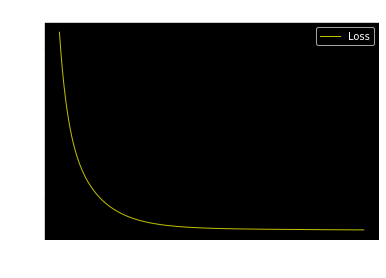

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline
%reload_ext autoreload
%autoreload 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
model = VanillaLinearRegression(alpha=0.001, epochs=5000)
model.fit(X_train, y_train, lamda=50)
y_pred = model.predict(X_test)
loss = model.cost_function_andrew_ng(X_test, y_test, y_pred)
y_pred_line = model.predict(X)
losses = model.get_losses()
print(f'Loss: {loss :.3f}, r2 score: {r2_score(y_test, y_pred) :.3f}')

fig = plt.figure()
plt.title("Loss vs Epochs")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.plot(losses, color="y", linewidth=1, label="Loss")
plt.legend()
plt.show()


### Cross Validation

In [29]:
from sklearn.model_selection import KFold, LeavePOut

def train_test_cross_validation(model, X, y, cross_validator=KFold, k=5, p=2):
    '''Returns the optimal model'''
    optimal_model = None
    optimal_model_loss = float('inf')
    optimal_regularization = 0
    optimal_X_test = None
    optimal_y_test = None
    
    if cross_validator == KFold:
        cv = KFold(n_splits=k, shuffle=True)
    else:
        cv = LeavePOut(p=p)

    losses = []

    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        for lamda in range(0, 51, 10):
            model.fit(X_train, y_train, lamda=lamda)
            y_pred = model.predict(X_test)
            loss = model.cost_function_andrew_ng(X_test, y_test, y_pred)

            if loss < optimal_model_loss:
                optimal_model = model
                optimal_model_loss = loss
                optimal_regularization = lamda
                optimal_X_test = X_test
                optimal_y_test = y_test
                losses = model.get_losses()


            model.reset_losses()
        
    return optimal_model, losses, optimal_regularization, optimal_X_test, optimal_y_test


##### K-Fold

Loss: 1205062.123, r2 score: 0.849


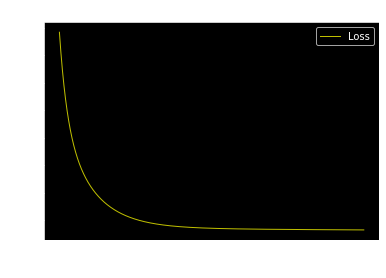

In [30]:
model = VanillaLinearRegression(alpha=0.001, epochs=5000)
optimal_model, losses, optimal_regularization, X_test, y_test = train_test_cross_validation(
    model, X, y, cross_validator=KFold, k=5)
y_pred = optimal_model.predict(X_test)
loss = optimal_model.cost_function_andrew_ng(X_test, y_test, y_pred)

print(f'Loss: {loss :.3f}, r2 score: {r2_score(y_test, y_pred) :.3f}')

y_pred_line = optimal_model.predict(X)

fig = plt.figure()
plt.title("Loss vs Epochs")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.plot(losses, color="y", linewidth=1, label="Loss")
plt.legend()
plt.show()


In [31]:
optimal_regularization

50

##### Leave P Out 
This is ideal for smaller datasets because it tests all permutations of test sets of size p, which can take a while to compute.

Loss: 1205062.123, r2 score: 0.849


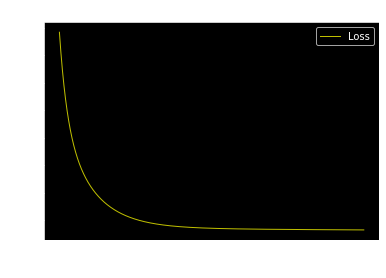

In [32]:
model = VanillaLinearRegression(alpha=0.001, epochs=5000)
# optimal_model, losses = train_test_cross_validation(model, X, y, cross_validator=LeavePOut, p=2)
y_pred = optimal_model.predict(X_test)
loss = optimal_model.cost_function_andrew_ng(X_test, y_test, y_pred)

print(f'Loss: {loss :.3f}, r2 score: {r2_score(y_test, y_pred) :.3f}')

y_pred_line = optimal_model.predict(X)

fig = plt.figure()
plt.title("Loss vs Epochs")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.plot(losses, color="y", linewidth=1, label="Loss")
plt.legend()
plt.show()

### Sklearn - Linear Regression Comparison


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_prediction = model.predict(X_test)
model.intercept_, model.coef_
print(f'r2 score: {r2_score(y_test, y_pred) :.3f}')

r2 score: 0.849
